# Abundance of plasmid-dependent phages in wastewater

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = 1/2.54

## Read and process data

In [2]:
df = pd.read_csv('data/counts.tsv', sep='\t')
df = df.rename(columns={'x': 'strain'})

In [3]:
# replace counts 0 for 1, for log scale
df['titer(pfu/mL)'] = df['titer(pfu/mL)'].replace(0.0, 1)

# get mean for line
df_mean = df.groupby('strain', sort=False)['titer(pfu/mL)'].mean()

In [4]:
df_mean

strain
ppu                 4.500000
sen               110.000000
eco              4200.000000
ppuRP4+senRP4    1016.666667
Name: titer(pfu/mL), dtype: float64

## Figure

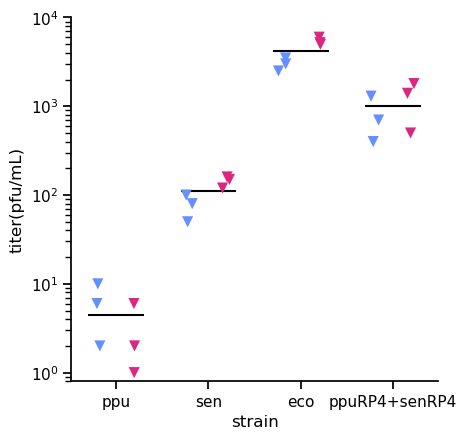

In [6]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(12*cm,12*cm))

g = sns.stripplot(x='strain', 
                  y='titer(pfu/mL)',
                  data=df,
                  hue='location',
                  dodge=True, 
                  marker='v',
                  size=8,
                  palette=sns.color_palette(['#648fff', '#dc267f']))

_ = [g.hlines(y, i-.3, i+.3, colors=['#000000']) for i, y in df_mean.reset_index()['titer(pfu/mL)'].items()]


plt.ylim([0.8, 10000])
plt.gca().set_yscale('log')

sns.despine()
g.get_legend().remove()
#plt.savefig('data/svg/abundance.svg')